In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
dataset = pd.read_csv(r"Social_Network_Ads.csv")
dataset.head(10)


,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
5,27,58000,0
6,27,84000,0
7,32,150000,1
8,25,33000,0
9,35,65000,0


In [6]:
dataset.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [7]:
x=dataset.iloc[:,:-1]
y=dataset["Purchased"]

In [8]:
sc=StandardScaler()
sc.fit(x)
x=pd.DataFrame(sc.transform(x),columns=x.columns)

In [9]:
x

,Age,EstimatedSalary
0,-1.781797,-1.490046
1,-0.253587,-1.460681
2,-1.113206,-0.785290
3,-1.017692,-0.374182
4,-1.781797,0.183751
...,...,...
395,0.797057,-0.844019
396,1.274623,-1.372587
397,1.179110,-1.460681
398,-0.158074,-1.078938


In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
dt=DecisionTreeClassifier(max_depth=3)
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [13]:
dt.score(x_test,y_test)*100

91.25

In [14]:
dt.score(x_train,y_train)*100

91.875

In [15]:
# there is a difference btw train and test score means there is data over fitting

In [16]:
dt.predict([[32,	150000]])
# 32	150000	1

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [17]:
from sklearn.tree import plot_tree

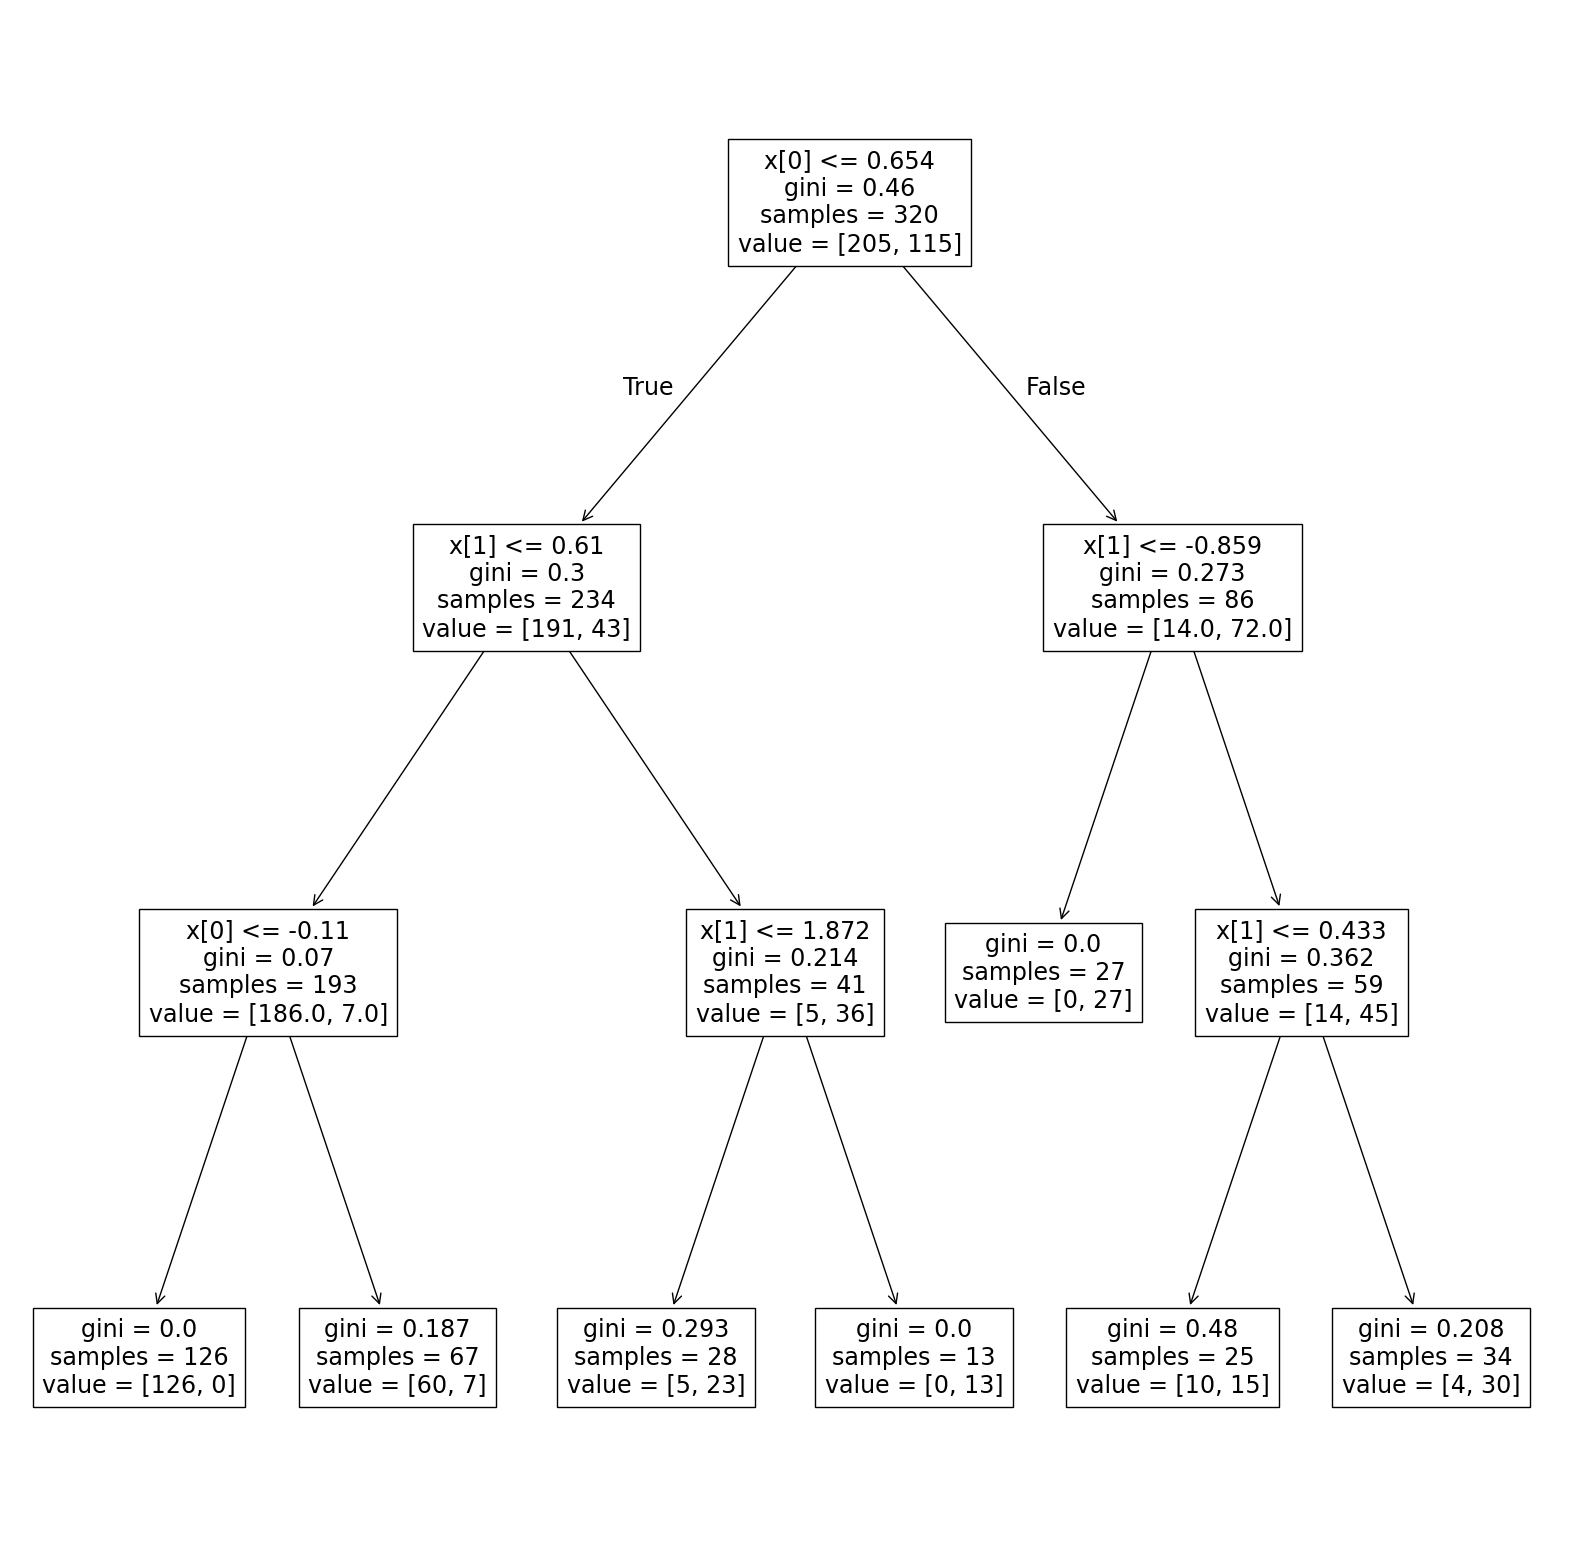

In [18]:
plt.figure(figsize=(20,20))
plot_tree(dt)
plt.savefig("demo.jpg")
plt.show()

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


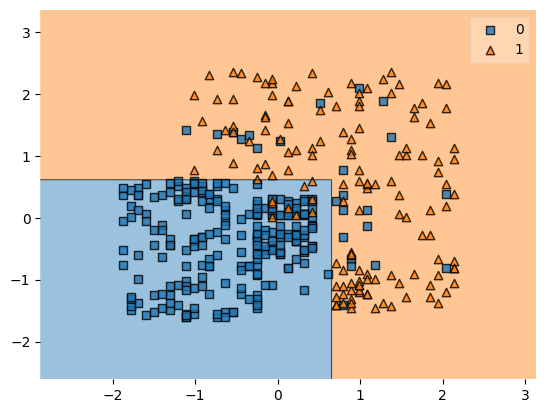

In [19]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=dt)
plt.show()

In [3]:
for i in range(1,20):
    dt2=DecisionTreeClassifier(max_depth=i)
    dt2.fit(x_train,y_train)
    print(dt2.score(x_train,y_train)*100,dt2.score(x_test,y_test)*100,i)

NameError: name 'DecisionTreeClassifier' is not defined

In [4]:
# 91.875 91.25 3 there is least difference hence choose this